Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Joshua Zempoalteca"
COLLABORATORS = "N/A"

---

# Homework 3

## Please answer the questions below by entering and executing code in the box below each question.  

## The goals of this assignment are to reinforce lessons about logical statements and plotting.  


In [2]:
# import the modules you will need to do this assignment.  
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## For this assignment you will organize some data and make some plots from an experiment on emotional priming. 

## This experiment replicates a well-known phenomenon of musical priming - the emotional valence of musical stimuli can influence the speed of information processing of words with the same emotional valence. 

### These studies have shown the presence of congruency effects—i.e., positive words are evaluated faster when preceded by positive music than negative music, and similarly for negative words and negative music.  

### The purpose the data set collected here, was a COVID specific goal - to establish that this known effect could be measured through a crowd sourcing online platform, without needing for the subject to come in to the laboratory.  

### Individuals listened to a 1 second clip of music that was independently rated as positive or negative.  They were then presented a word with either a positive or negative affect.  They had to response by classifying the word as positive or negative.  The dependent variable is the response time.  The prediction is that a negative affect music produces a faster response (smaller value of response time) for negative words than positive words, while the positive affect music produces a faster response (smaller value of response time) for positive words than negative words.  

In [3]:
data = pd.read_excel('Emotional_Prime_Task_labeled.xlsx')

In [4]:
data.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trial', 'stimulus', 'prime',
       'prime_affect', 'word', 'word_affect', 'responsetime', 'accuracy'],
      dtype='object')

### The data file has several important pieces of information.  For todays homework we will only use some of the information. 

* ### prime_affect indicates what type of music was played - positive or negative. 
* ### word_affect indicates what type of word was presented - positive or negative.  
* ### responsetime gives the response time for each trial.  

### As a first step, copy the variables of interest into numpy arrays.  

In [5]:
prime_affect = np.array(data['prime_affect'])
word_affect = np.array(data['word_affect'])
responsetime = np.array(data['responsetime'])

### Plot 1.  First, lets visualize if there is a general effect on response time of positive and negative music. Make a histogram that shows the distribution of response time for positive and negative music. The histogram should show two different colored histograms in the same plot, one for prime_affect that is positive and the other for prime_affect that is negative. 

### Hint:  Logical statements can be used with string variables.  Thus the statement, 

### `negativetrials = (prime_affect == 'negative')`

### returns `True` when the prime_affect is 'negative' and `False` when prime_affect is 'positive'.  This boolean array can be used to index responsetime.  


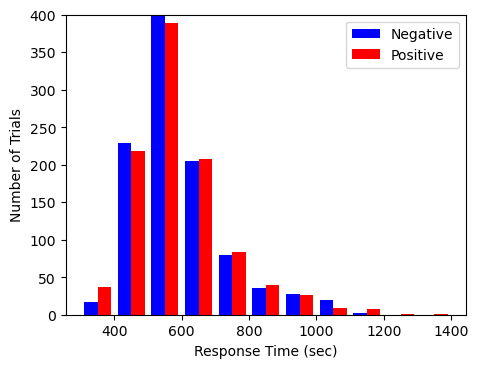

In [33]:
positive_trials = (prime_affect == 'positive')
negative_trials = (prime_affect == 'negative')

pos_rT = responsetime[positive_trials]
neg_rT = responsetime[negative_trials]
RTs = [neg_rT,pos_rT]

bins = np.arange(300,1500,100)
fig = plt.figure(figsize = (4,3))
ax = fig.add_axes([0,0,1,1])
ax.hist(RTs,bins, color=('blue','red'))  #I sent the list containing all 2 arrays. 
ax.set_xlabel('Response Time (sec)')
ax.set_ylabel('Number of Trials')
plt.ylim([0, 400])
ax.legend(labels = ['Negative', 'Positive'])

### Plot 2.  Make a bar plot with error bars that shows the mean and standard deviation of response time for each of the four conditions of the experiment: (1) positive music with positive words, (2) positive music with negative words, (3) negative music with positive words, and (4) negative music with negative words.   We expect the matched conditions to produce faster responses than the unmatched conditions. 

### Hint: You can use Boolean Operators to combine logical statements. Thus the statement, 

`pos_pos_trials = (prime_affect == 'positive') & (word_affect == 'positive')` 

### indicates `True` for trials with 'positive' music prime and 'positive' word.  

Text(0.5, 1.0, 'Mean Times of Priming and Word Affect')

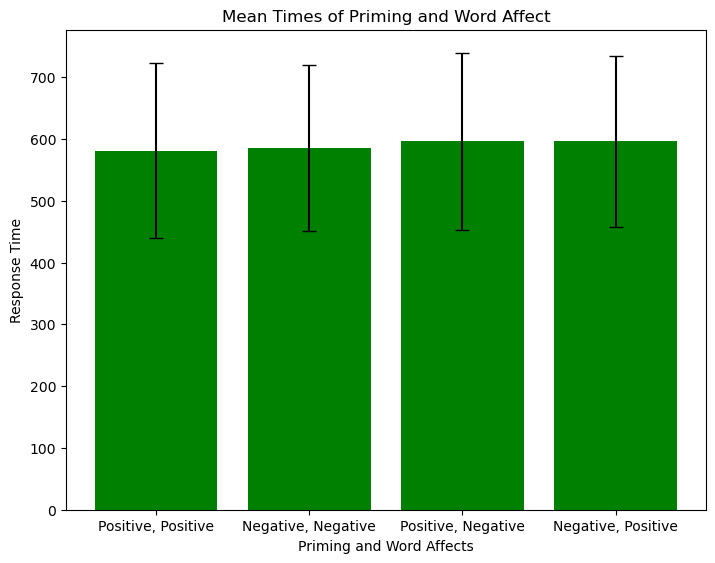

In [50]:
#index section
double_pos_trials = responsetime[(prime_affect == 'positive') & (word_affect == 'positive')]
double_neg_trials = responsetime[(prime_affect == 'negative') & (word_affect == 'negative')]
pos_neg_trials = responsetime[(prime_affect == 'positive') & (word_affect == 'negative')]
neg_pos_trials = responsetime[(prime_affect == 'negative') & (word_affect == 'positive')]

#list creations
mean_rt = list()
std_rt = list() 
conditions = ["Positive, Positive", "Negative, Negative", "Positive, Negative", "Negative, Positive"]

#mean calculations
mean_rt.append(np.mean(double_pos_trials)) 
mean_rt.append(np.mean(double_neg_trials))
mean_rt.append(np.mean(pos_neg_trials))
mean_rt.append(np.mean(neg_pos_trials))

#STD calculations
std_rt.append(np.std(double_pos_trials)) 
std_rt.append(np.std(double_neg_trials))
std_rt.append(np.std(pos_neg_trials))
std_rt.append(np.std(neg_pos_trials))

#plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(conditions, mean_rt,color = 'green', yerr = std_rt,capsize = 5)
ax.set_xlabel('Priming and Word Affects')
ax.set_ylabel('Response Time')
ax.set_title("Mean Times of Priming and Word Affect")
